# Praproses Pemodelan GARCH

In [ ]:
!pip install arch

In [ ]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel("/content/Data Praproses GARCH.xlsx")
data = data.loc[:, ['Tanggal', 'Boxcox', 'Diff']]
data['Diff'] = data['Diff']/100
data['DiffA'] = data['Diff']*100

print(data.head())
print(data.shape)

     Tanggal    Boxcox      Diff     DiffA
0 2023-01-01  0.011499       NaN       NaN
1 2023-01-02  0.014168 -0.070833 -7.083333
2 2023-01-03  0.016095 -0.037500 -3.750000
3 2023-01-04  0.016535 -0.007428 -0.742754
4 2023-01-05  0.017960 -0.021739 -2.173913
(851, 4)


In [ ]:
print(data.tail())

       Tanggal    Boxcox      Diff     DiffA
846 2025-04-26  0.029001  0.000000  0.000000
847 2025-04-27  0.029001  0.000000  0.000000
848 2025-04-28  0.026384  0.016667  1.666667
849 2025-04-29  0.029001 -0.016667 -1.666667
850 2025-04-30  0.043592 -0.058333 -5.833333


## Splitting Data

Jumlah data latih: 731
Jumlah data uji: 120


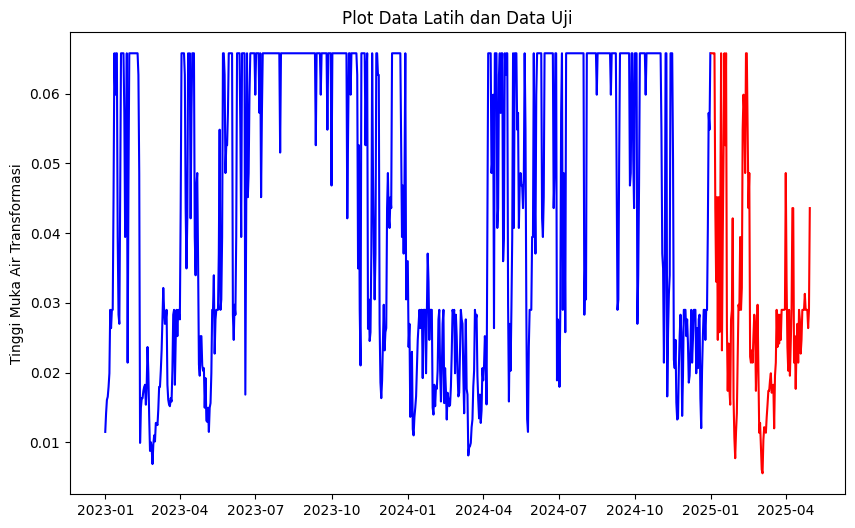

In [ ]:
test_size = 120

train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))

# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Boxcox'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['Boxcox'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Tinggi Muka Air Transformasi')
# plt.legend()
plt.show()

Jumlah data latih: 731
Jumlah data uji: 120


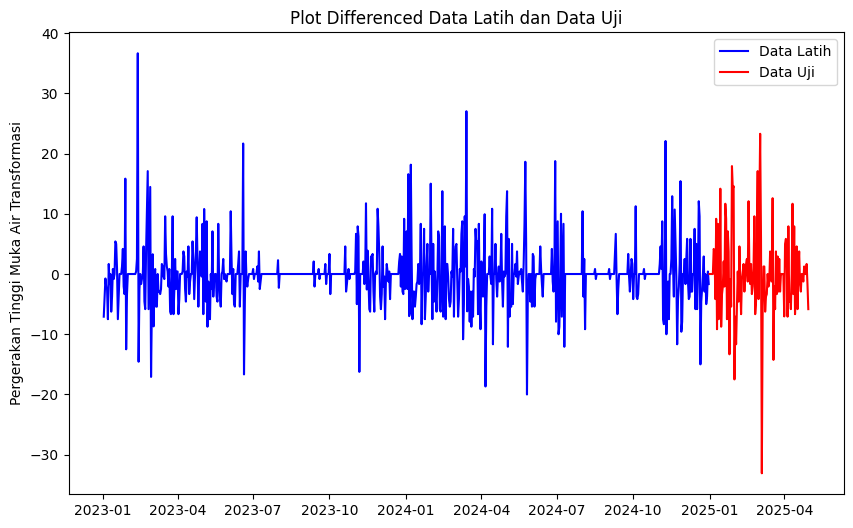

In [ ]:
# Plot Differenced Data Latih dan Data Uji

print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))

# Plot the differenced training and testing data
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['DiffA'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['DiffA'], label='Data Uji', color='red')
plt.title('Plot Differenced Data Latih dan Data Uji')
plt.ylabel('Pergerakan Tinggi Muka Air Transformasi')
plt.legend()
plt.show()

In [ ]:
data_diff = data['Diff'][1:]

train_data_diff = data_diff.iloc[:-test_size]
test_data_diff = data_diff.iloc[-test_size:]

print(train_data_diff.head())
print(train_data_diff.shape)

print(test_data_diff.head())
print(test_data_diff.shape)

1   -0.070833
2   -0.037500
3   -0.007428
4   -0.021739
5   -0.025000
Name: Diff, dtype: float64
(730,)
731    0.0
732    0.0
733    0.0
734    0.0
735    0.0
Name: Diff, dtype: float64
(120,)


# Pengujian Efek ARCH (ARCH-LM Test)

In [ ]:
train_data_diff

,Diff
1,-0.070833
2,-0.037500
3,-0.007428
4,-0.021739
5,-0.025000
...,...
726,0.000000
727,-0.050000
728,-0.037500
729,0.004167


In [ ]:
from arch.unitroot import ADF
from arch.__future__ import reindexing
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch
import numpy as np

# Misalnya train_diff adalah array atau Series dari data differenced

import statsmodels.api as sm

for i in range(1, 21):
    # het_arch mengembalikan nilai: (LM stat, p-value, F stat, F p-value)
    lm_stat, lm_pvalue, f_stat, f_pvalue = het_arch(train_data_diff, maxlag=i)
    print(f"P Value LM Test lag ke {i} adalah {lm_pvalue}")

P Value LM Test lag ke 1 adalah 1.648225284429545e-05
P Value LM Test lag ke 2 adalah 7.640180808681128e-05
P Value LM Test lag ke 3 adalah 0.00021846437219954966
P Value LM Test lag ke 4 adalah 0.00032245216998292914
P Value LM Test lag ke 5 adalah 0.0007277161612093342
P Value LM Test lag ke 6 adalah 0.0016184730055915108
P Value LM Test lag ke 7 adalah 0.003339446363244853
P Value LM Test lag ke 8 adalah 0.005781398544685254
P Value LM Test lag ke 9 adalah 0.009199375420560305
P Value LM Test lag ke 10 adalah 0.01544534050013187
P Value LM Test lag ke 11 adalah 0.01733735192862998
P Value LM Test lag ke 12 adalah 0.013895848079897162
P Value LM Test lag ke 13 adalah 0.01374027878489415
P Value LM Test lag ke 14 adalah 0.012474921167669753
P Value LM Test lag ke 15 adalah 0.000376495392387006
P Value LM Test lag ke 16 adalah 0.0004852035325741642
P Value LM Test lag ke 17 adalah 0.0007791051449104675
P Value LM Test lag ke 18 adalah 0.0012715435318971444
P Value LM Test lag ke 19 ada

<ipython-input-79-5e34ebf115e5>:13: FutureWarning: the 'maxlag' keyword is deprecated, use 'nlags' instead.
  lm_stat, lm_pvalue, f_stat, f_pvalue = het_arch(train_data_diff, maxlag=i)


**Interpretasi:**
Hasil uji ARCH-LM yang disajikan menunjukkan *p-value* yang **lebih kecil** daripada taraf nyata 5% pada lag ke-1 hingga lag ke-20. Hal ini memenuhi syarat penolakan terhadap hipotesis nol sehingga dapat disimpulkan bahwa terdapat pengaruh **efek ARCH** yang mengindikasikan adanya keheterogenan ragam pada data hingga lag ke-20 dalam taraf nyata 5%.

> !!! Data yang terindikasi memiliki keheterogenan ragam hingga lebih dari lag ke-12 lebih cocok dimodelkan menggunakan model GARCH dibanding model ARCH.

# Pemodelan GARCH

Pemodelan ARCH/GARCH dilakukan dengan mencoba beberapa model dari GARCH(1,1), GARCH(2,1), GARCH(1,2), GARCH(2,2)

## GARCH(1,1)

In [ ]:
from arch import arch_model

model_garch11_diff = arch_model(train_data_diff, vol='GARCH', mean='constant', p=1, q=1)

# Estimasi model
results11 = model_garch11_diff.fit(disp='off')

# Tampilkan hasil estimasi
print(results11.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1224.77
Distribution:                  Normal   AIC:                          -2441.55
Method:            Maximum Likelihood   BIC:                          -2423.18
                                        No. Observations:                  730
Date:                Sat, May 17 2025   Df Residuals:                      729
Time:                        00:07:47   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.6418e-03  1.150e-03      1.427      0.154 

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002493. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


## GARCH(2,1)

In [ ]:
from arch import arch_model

model_garch21_diff = arch_model(train_data_diff, vol='GARCH', mean='constant', p=2, q=1)

# Estimasi model
results21 = model_garch21_diff.fit(disp='off')

# Tampilkan hasil estimasi
print(results21.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1224.80
Distribution:                  Normal   AIC:                          -2439.61
Method:            Maximum Likelihood   BIC:                          -2416.64
                                        No. Observations:                  730
Date:                Sat, May 17 2025   Df Residuals:                      729
Time:                        00:07:47   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.4257e-03  9.754e-04      1.462      0.144 

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002493. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


## GARCH(1,2)

In [ ]:
from arch import arch_model

model_garch12_diff = arch_model(train_data_diff, vol='GARCH', mean='constant', p=1, q=2)

# Estimasi model
results12 = model_garch12_diff.fit(disp='off')

# Tampilkan hasil estimasi
print(results12.summary())

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002493. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1224.90
Distribution:                  Normal   AIC:                          -2439.80
Method:            Maximum Likelihood   BIC:                          -2416.83
                                        No. Observations:                  730
Date:                Sat, May 17 2025   Df Residuals:                      729
Time:                        00:07:47   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.1392e-03  1.174e-03      0.971      0.332 

## GARCH(2,2)

In [ ]:
from arch import arch_model

model_garch22_diff = arch_model(train_data_diff, vol='GARCH', mean='constant', p=2, q=2)

# Estimasi model
results22 = model_garch22_diff.fit(disp='off')

# Tampilkan hasil estimasi
print(results22.summary())

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002493. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1222.20
Distribution:                  Normal   AIC:                          -2432.41
Method:            Maximum Likelihood   BIC:                          -2404.85
                                        No. Observations:                  730
Date:                Sat, May 17 2025   Df Residuals:                      729
Time:                        00:07:47   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.1188e-03  1.156e-03      0.968      0.333 

## Tabel: Dugaan Nilai Parameter Model GARCH

In [ ]:
import pandas as pd

model_results = {
    'GARCH(1,1)': results11,
    'GARCH(2,1)': results21,
    'GARCH(1,2)': results12,
    'GARCH(2,2)': results22,
}

data = []
for model_name, result in model_results.items():
  params = result.params
  pvalues = result.pvalues
  aic = result.aic

  # Extract relevant parameters (adjust as needed based on model summary)
  param_names = list(params.index)

  for param_name in param_names:
      data.append([model_name, param_name, params[param_name], pvalues[param_name], aic])


df_garch = pd.DataFrame(data, columns=['Model', 'Parameter', 'Koefisien Parameter', 'P-Value', 'AIC'])
df_garch


,Model,Parameter,Koefisien Parameter,P-Value,AIC
0,"GARCH(1,1)",mu,0.001642,1.535644e-01,-2441.547708
1,"GARCH(1,1)",omega,0.000060,2.685287e-01,-2441.547708
2,"GARCH(1,1)",alpha[1],0.119552,9.553875e-03,-2441.547708
3,"GARCH(1,1)",beta[1],0.862188,8.851153e-92,-2441.547708
4,"GARCH(2,1)",mu,0.001426,1.438177e-01,-2439.608457
5,"GARCH(2,1)",omega,0.000054,1.728940e-01,-2439.608457
6,"GARCH(2,1)",alpha[1],0.071144,4.852908e-02,-2439.608457
7,"GARCH(2,1)",alpha[2],0.055945,2.956434e-01,-2439.608457
8,"GARCH(2,1)",beta[1],0.874677,3.433977e-80,-2439.608457
9,"GARCH(1,2)",mu,0.001139,3.317800e-01,-2439.799913


In [ ]:
# Create a new DataFrame to store the results
garch_summary = pd.DataFrame(columns=['Model', 'Parameter', 'Koefisien Parameter', 'P-Value', 'Signifikansi', 'AIC'])

# Function to determine significance
def significance(p_value):
    if p_value < 0.05:
        return 'Signifikan'
    else:
        return 'Tidak Signifikan'

# Iterate through the models and extract information
for model_name, result in model_results.items():
    params = result.params
    pvalues = result.pvalues
    aic = result.aic

    for param_name in params.index:
        garch_summary = pd.concat([garch_summary, pd.DataFrame({
            'Model': [model_name],
            'Parameter': [param_name],
            'Koefisien Parameter': [params[param_name]],
            'P-Value': [pvalues[param_name]],
            'Signifikansi': [significance(pvalues[param_name])],
            'AIC': [aic]
        })], ignore_index=True)

# Display the summary table
garch_summary


<ipython-input-85-1b1012bb346a>:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  garch_summary = pd.concat([garch_summary, pd.DataFrame({


,Model,Parameter,Koefisien Parameter,P-Value,Signifikansi,AIC
0,"GARCH(1,1)",mu,0.001642,1.535644e-01,Tidak Signifikan,-2441.547708
1,"GARCH(1,1)",omega,0.000060,2.685287e-01,Tidak Signifikan,-2441.547708
2,"GARCH(1,1)",alpha[1],0.119552,9.553875e-03,Signifikan,-2441.547708
3,"GARCH(1,1)",beta[1],0.862188,8.851153e-92,Signifikan,-2441.547708
4,"GARCH(2,1)",mu,0.001426,1.438177e-01,Tidak Signifikan,-2439.608457
5,"GARCH(2,1)",omega,0.000054,1.728940e-01,Tidak Signifikan,-2439.608457
6,"GARCH(2,1)",alpha[1],0.071144,4.852908e-02,Signifikan,-2439.608457
7,"GARCH(2,1)",alpha[2],0.055945,2.956434e-01,Tidak Signifikan,-2439.608457
8,"GARCH(2,1)",beta[1],0.874677,3.433977e-80,Signifikan,-2439.608457
9,"GARCH(1,2)",mu,0.001139,3.317800e-01,Tidak Signifikan,-2439.799913


## Resume Model Terbaik GARCH

- GARCH(1,1): 2 / 4 dugaan parameter yang signifikan ( AIC = -2441.547708 ) ***
- GARCH(2,1): 2 / 5 dugaan parameter yang signifikan ( AIC = -2439.608457 )
- GARCH(1,2): 1 / 5 dugaan parameter yang signifikan ( AIC = -2439.799913 )
- GARCH(2,2): 0 / 7 dugaan parameter yang signifikan ( AIC = -2432.408947 )

# Pendugaan Parameter Model GARCH

## Best Model GARCH

In [ ]:
from arch import arch_model
import pandas as pd

# Specify the GARCH(1,1) model
model_garch11_diff = arch_model(train_data_diff, vol='GARCH', mean='constant', p=1, q=1)

# Fit the model
result_garch11_diff = model_garch11_diff.fit()

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002493. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 185613932.78721276
Iteration:      2,   Func. Count:     18,   Neg. LLF: 45600.76373875301
Iteration:      3,   Func. Count:     25,   Neg. LLF: -1213.5718475798935
Iteration:      4,   Func. Count:     31,   Neg. LLF: -1224.773860046099
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1224.773853992132
            Iterations: 8
            Function evaluations: 31
            Gradient evaluations: 4


In [ ]:
# Display model fitting summary
print(result_garch11_diff.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1224.77
Distribution:                  Normal   AIC:                          -2441.55
Method:            Maximum Likelihood   BIC:                          -2423.18
                                        No. Observations:                  730
Date:                Sat, May 17 2025   Df Residuals:                      729
Time:                        00:07:47   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.6418e-03  1.150e-03      1.427      0.154 

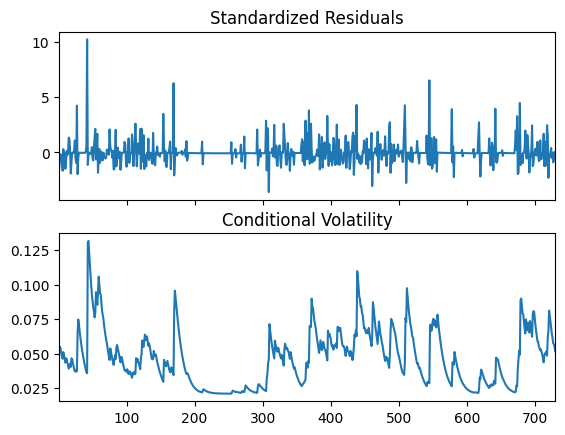

In [ ]:
fig = result_garch11_diff.plot()

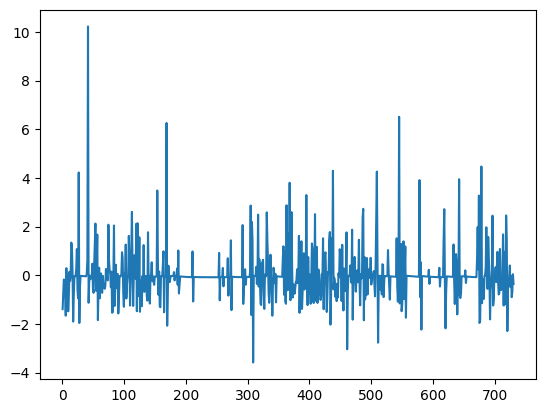

In [ ]:
garch_stresidual = result_garch11_diff.resid / result_garch11_diff.conditional_volatility
plt.plot(garch_stresidual)

In [ ]:
garch_stresidual

,0
1,-1.389196
2,-0.710589
3,-0.169622
4,-0.464452
5,-0.554331
...,...
726,-0.026778
727,-0.898858
728,-0.689322
729,0.045925


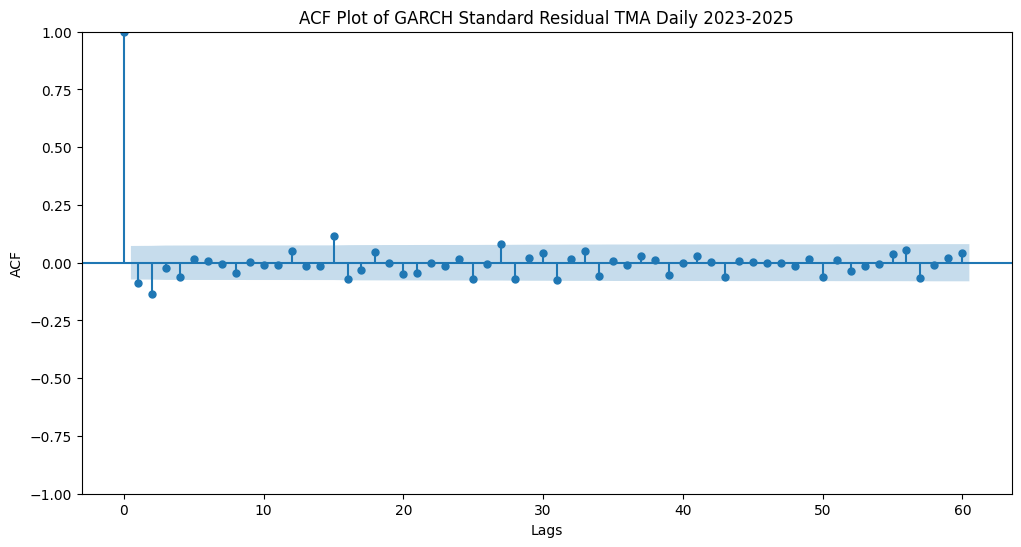

In [ ]:
# ACF Plot of garch_stresidual
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(garch_stresidual, lags=60, ax=ax)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('ACF Plot of GARCH Standard Residual TMA Daily 2023-2025')
plt.show()

## Uji Diagnostik Sisaan

### Diagnostik Sisaan Model GARCH: Uji Homogenitas Sisaan (Ljung-Box Test

#### Pengujian Hipotesis

##### $H_0$: Sisaan homogen
##### $H_1$: Sisaan tidak homogen

In [ ]:
import statsmodels.api as sm
result_df = sm.stats.acorr_ljungbox((garch_stresidual)**2, lags=range(1,21), return_df=True)
print(result_df)

      lb_stat  lb_pvalue
1    0.285397   0.593186
2    0.292343   0.864010
3    0.295567   0.960860
4    0.387222   0.983510
5    0.520028   0.991372
6    0.966013   0.986868
7    1.349972   0.987055
8    1.533383   0.992139
9    1.886132   0.993143
10   2.104315   0.995476
11   2.127631   0.997995
12   2.146441   0.999146
13   2.646812   0.998938
14   2.646836   0.999552
15  14.736592   0.470552
16  14.744999   0.543389
17  14.954801   0.598737
18  15.049445   0.658569
19  15.349007   0.700172
20  15.933283   0.720755


**Interpretasi:**
Berdasarkan uji homogenitas sisaan (Ljung-Box Test), diperoleh *p-value* dari lags 1 s.d 20 seluruhnya bernilai lebih dari taraf nyata 5% sehingga *Tak Tolak H0*.

### Diagnostik Sisaan Model GARCH: Uji Kebebasan Sisaan (Ljung-Box Test)

#### Pengujian Hipotesis

##### $H_0$: Sisaan saling bebas
##### $H_1$: Sisaan tidak saling bebas

In [ ]:
import statsmodels.api as sm
result_df = sm.stats.acorr_ljungbox(abs(garch_stresidual), lags=[10], return_df=True)
print(result_df)

      lb_stat     lb_pvalue
10  49.747412  2.970247e-07


**Interpretasi:**
Berdasarkan uji kebebasan sisaan (Ljung-Box Test), diperoleh *p-value* sebesar 2.970247e-07 yang kurang dari taraf nyata 5% sehingga *tolak $H_0$*.

### Diagnostik Sisaan Model GARCH: Uji Normalitas Sisaan (Kolmogorov-Smirnov Test)

#### Pengujian Hipotesis

##### $H_0$: Sisaan menyebar normal
##### $H_1$: Sisaan tidak menyebar normal

In [ ]:
from scipy import stats
result_norm = stats.kstest(garch_stresidual, 'norm')
print(result_norm.pvalue)

9.124149895226424e-39


**Interpretasi:**
Berdasarkan uji normalitas sisaan (KS Test), diperoleh *p-value* sebesar 9.124149895226424e-39 yang kurang dari taraf nyata 5% sehingga *tolak $H_0$*.

### Diagnostik Sisaan Model GARCH: Uji Nilai Harapan Sisaan (t-Test)

#### Pengujian Hipotesis

##### $H_0$: Nilai harapan sisaan sama dengan nol
##### $H_1$: Nilai harapan sisaan tidak sama dengan nol

In [ ]:
result_harapan = stats.ttest_1samp(garch_stresidual, 0)
print(result_harapan.pvalue)

0.8018496032792409


**Interpretasi:**
Berdasarkan uji nilai harapan sisaan nol (t-test), diperoleh *p-value* sebesar 0.8018496032792409 yang lebih besar dari taraf nyata 5% sehingga *tak tolak $H_0$*.

## Resume Hasil Uji Diagnostik Sisaan Model GARCH

1. Uji Homogenitas Sisaan: (p-value = 0.720755), Tak Tolak H0 = Sisaan homogen
2. Uji Kebebasan Sisaan: (p-value = 2.970247e-07), Tolak H0 = Sisaan tidak saling bebas
3. Uji Normalitas Sisaan: (p-value = 9.124149895226424e-39), Tolak H0 = Sisaan tidak menyebar normal
4. Uji Nilai Tengah Sisaan: (p-value = 0.8018496032792409), Tak Tolak H0 = Nilai tengah sisaan sama dengan nol